# Stock Price Sentiment Analysis using Tweet Data

## Team Members


1. Uzay Karadağ | 090200738
2. Hasan Çelik | 090180305
3. Muhammed Fatih Kaya | 090200751

## Dataset

We are going to use the **[tweepy](https://www.tweepy.org/)** module to gather tweets using the Twitter API for the given stock using queries containing the respective ticker.


## Description of the Problem

After gathering tweets about our respective stocks we will perform sentiment anlaysis on the tweets about the given ticker using various NLP modules. We will then use this sentiments to predict if the stock will close higher or lower than the opening price on that date. We will test the data using the price time series from the **yfinance** module.

## Project Overview

First we will start off by acquiring the raw tweets from the **tweepy** module and then process the raw text data using the several methods we learned during the class. We will then form a DataFrame using the **pandas** library where individual tickers and dates are listed properly.

Second, we will do Exploratory Data Analysis to get a better picture on the dataset.

We will then use **spaCy** and **NLTK** to perform sentiment analysis in the newly formed DataFrame. We may fine tune features and other parameters given the accuracy of our model.

Lastly, we will test the model against historical price data gathered from **yfinance**. May circle back to Step 2 if needed.


## Project Pieces and Calendar
1. Data Acquisition | Uzay Karadağ ~ 1 week

    a) Gathering appropriate tweet dataset for related

    b) Gathering stock prices in the time interval suitable for the tweet dataset

2. Data Cleaning and Preprocessing | Uzay Karadağ ~ 0.5 week

    a) Removing incorrect or irrelevant data from the dataset

    b) Merge datasets at the appropriate time interval

3. EDA | Hasan Çelik ~ 0.5 week

    a) Data visualization

    b) Discovering pattern

4. Analysis of EDA | Hasan Çelik ~ 1 week

    a) Sentiment Analysis of tweets with Natural Language Processing (NLP)

5. Literature Review, Feature Engineering | Fatih Kaya ~ 1 week

    a) Feature Creation & Selection

    b) Review of similar studies

6. Model Construction | Fatih Kaya ~ 1 week

    a) Train - Test Splitting

    b) Performing several algorithms

    c) Model Evaluation and choosing suitable modelling


### Hardware and Software

1. Uzay Karadağ: 2017 MacBook Pro | 2,3 GHz Dual-Core Intel Core i5, 8GB RAM
2. Fatih Kaya: Monster Abra A5 v15.5 | 2.4 GHz Quad-Core Intel Core i5, 16GB RAM 
3. Hasan Çelik: Dell Vostro 3515 |  2,6 GHz AMD Ryzen7, 16 GB RAM

*Google Colab might be used for GPU and/or TPU computation if needed.*

## Atabey's notes

Looks good. Go ahead.

### Converting data to meaningful numbers

For sentiment analysis, we will employ the Vader library. Following data preprocessing, we will use the polarity_scores() function to obtain each tweet's negative, positive, neutral, and compund scores. We can use the average emotion scores or generate weighted scores using columns such as likes to convert these scores into meaningful numbers for the model (more likes means more visibility).

### Clearing the Data

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Even though we tried several times we couldn't maange to get the Twitter API access (Thanks Elon!) As of now we have decided to use an alternative [dataset](https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?resource=download&select=Tweet.csv) from Kaggle, however we couldn't find a way to import the dataset into the notebook without downloading it to the OS of the machine running it. We will try to come up with a method to do that in the coming days. For now see this as a scratch commit that demonstrates how the time series data will be merged(joined) using data processing. 

### Getting tweet data

In [2]:
tdf  = pd.read_csv('./data/Tweet.csv')
tdf

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [3]:
ctdf = pd.read_csv('./data/Company_Tweet.csv')
ctdf

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


- We combined two dataframes with an inner join to link tweets and companies.

In [4]:
df = tdf.join(ctdf, how='inner', lsuffix='_t', rsuffix='_ct')
df

,tweet_id_t,writer,post_date,body,comment_num,retweet_num,like_num,tweet_id_ct,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,550803612197457920,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,550803610825928706,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,550803225113157632,AAPL
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,550802957370159104,AAPL
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,550802855129382912,AAPL
...,...,...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6,1012677309940359168,TSLA
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,1012677639792943104,TSLA
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,1012677722924036096,TSLA
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,1012677751738904577,TSLA


In [5]:
df.drop(['tweet_id_t','tweet_id_ct', 'writer'], axis=1, inplace=True)
df

,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AAPL
3,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,AAPL
4,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
...,...,...,...,...,...,...
3717959,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6,TSLA
3717960,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA
3717961,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA
3717962,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,TSLA


- By summing the comment, retweet and like columns, we got the total interaction column

In [6]:
df['interactions'] = df.iloc[:, 2:5].sum(axis=1)
df.drop(['comment_num', 'retweet_num', 'like_num'], axis=1, inplace=True)
df

,post_date,body,ticker_symbol,interactions
0,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL,1
1,1420070496,Insanity of today weirdo massive selling. $aap...,AAPL,0
2,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AAPL,0
3,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,AAPL,1
4,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,1
...,...,...,...,...
3717959,1577836383,That $SPY $SPX puuump in the last hour was the...,TSLA,7
3717960,1577836401,In 2020 I may start Tweeting out positive news...,TSLA,1
3717961,1577836443,Patiently Waiting for the no twitter sitter tw...,TSLA,5
3717962,1577836537,I don't discriminate. I own both $aapl and $ms...,TSLA,2


## Changing the post_date column to the date format we want.

In [7]:
import datetime

In [8]:
pdate = df.post_date.apply(lambda epoch : datetime.datetime.fromtimestamp(epoch))
pdate

0         2015-01-01 03:00:57
1         2015-01-01 03:01:36
2         2015-01-01 03:01:50
3         2015-01-01 03:06:47
4         2015-01-01 03:10:05
                  ...        
3717959   2020-01-01 02:53:03
3717960   2020-01-01 02:53:21
3717961   2020-01-01 02:54:03
3717962   2020-01-01 02:55:37
3717963   2020-01-01 02:55:53
Name: post_date, Length: 3717964, dtype: datetime64[ns]

In [9]:
df['post_date'] = pdate
df.rename(columns={'post_date': 'date', 'ticker_symbol': 'ticker', 'body': 'tweet'}, inplace=True)
df

,date,tweet,ticker,interactions
0,2015-01-01 03:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL,1
1,2015-01-01 03:01:36,Insanity of today weirdo massive selling. $aap...,AAPL,0
2,2015-01-01 03:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AAPL,0
3,2015-01-01 03:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,AAPL,1
4,2015-01-01 03:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,1
...,...,...,...,...
3717959,2020-01-01 02:53:03,That $SPY $SPX puuump in the last hour was the...,TSLA,7
3717960,2020-01-01 02:53:21,In 2020 I may start Tweeting out positive news...,TSLA,1
3717961,2020-01-01 02:54:03,Patiently Waiting for the no twitter sitter tw...,TSLA,5
3717962,2020-01-01 02:55:37,I don't discriminate. I own both $aapl and $ms...,TSLA,2


In [10]:
df['date'] = df['date'].apply(lambda dt : datetime.datetime.strptime(dt.strftime("%Y-%m-%d"), '%Y-%m-%d'))
df['date']

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
3717959   2020-01-01
3717960   2020-01-01
3717961   2020-01-01
3717962   2020-01-01
3717963   2020-01-01
Name: date, Length: 3717964, dtype: datetime64[ns]

In [11]:
df

,date,tweet,ticker,interactions
0,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL,1
1,2015-01-01,Insanity of today weirdo massive selling. $aap...,AAPL,0
2,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AAPL,0
3,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,AAPL,1
4,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,1
...,...,...,...,...
3717959,2020-01-01,That $SPY $SPX puuump in the last hour was the...,TSLA,7
3717960,2020-01-01,In 2020 I may start Tweeting out positive news...,TSLA,1
3717961,2020-01-01,Patiently Waiting for the no twitter sitter tw...,TSLA,5
3717962,2020-01-01,I don't discriminate. I own both $aapl and $ms...,TSLA,2


## Creation of Dataframes consisting of company data

- When we looked at the unique ticker values, we saw that the Google company was found with both "GOOG" and "GOOGL" tickers and we fixed it.

In [12]:
pd.unique(df.ticker)

array(['AAPL', 'GOOG', 'GOOGL', 'AMZN', 'MSFT', 'TSLA'], dtype=object)

In [13]:
df.loc[df['ticker'] == 'GOOGL', "ticker"] = 'GOOG'

In [14]:
pd.unique(df.ticker)

array(['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA'], dtype=object)

In [15]:
tickers = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']

- With the following loop, we created a library with a separate dataframe for each company.

In [16]:
t = {}
for ticker in tickers:
    t[ticker] = df.loc[df['ticker'] == ticker]
    t[ticker].drop(['ticker'], axis=1, inplace=True)

t['AAPL']

C:\Users\Hasan\AppData\Local\Temp\ipykernel_3692\182399052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[ticker].drop(['ticker'], axis=1, inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_3692\182399052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[ticker].drop(['ticker'], axis=1, inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_3692\182399052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[ticker

,date,tweet,interactions
0,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",1
1,2015-01-01,Insanity of today weirdo massive selling. $aap...,0
2,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0
3,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,1
4,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,1
...,...,...,...
1425008,2016-10-24,The bear case on Greater China has an underpin...,8
1425009,2016-10-24,#Microsoft You Can Now Try Outlook Premium on ...,0
1425010,2016-10-24,#Apple Watch still ahead as smartwatch sales d...,0
1425011,2016-10-24,#Apple Watch still ahead as smartwatch sales d...,0


### Obtaining share price information of companies

In [17]:
import yfinance as yf
import numpy as np

- What we want to predict is whether a stock's closing price is higher than its opening price. That's why we got the opening and closing prices of each company from yfinance and created our target variable. (close>open:1 , close<=open:0 )

In [18]:
p = {}
for ticker in tickers:
    p[ticker] = yf.download(ticker)
    p[ticker].drop(['High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
    p[ticker] = p[ticker].reset_index(level=0)
    p[ticker].rename(columns={'Date':'date', 'Open':'open', 'Close': 'close'}, inplace=True)
    p[ticker]['closed_higher'] = np.where(p[ticker]['close'] > p[ticker]['open'], 1, 0)
p['AAPL']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,date,open,close,closed_higher
0,1980-12-12 00:00:00-05:00,0.128348,0.128348,0
1,1980-12-15 00:00:00-05:00,0.122210,0.121652,0
2,1980-12-16 00:00:00-05:00,0.113281,0.112723,0
3,1980-12-17 00:00:00-05:00,0.115513,0.115513,0
4,1980-12-18 00:00:00-05:00,0.118862,0.118862,0
...,...,...,...,...
10597,2022-12-22 00:00:00-05:00,134.350006,132.229996,0
10598,2022-12-23 00:00:00-05:00,130.919998,131.860001,1
10599,2022-12-27 00:00:00-05:00,131.380005,130.029999,0
10600,2022-12-28 00:00:00-05:00,129.669998,126.040001,0


- We also brought the data we received from yfinance into daily date format.

In [19]:
for ticker in tickers :
    p[ticker]["date"] = p[ticker]["date"].apply(lambda dt : datetime.datetime.strptime(dt.strftime("%Y-%m-%d"), '%Y-%m-%d'))

-We obtained the datasets we will use by merging the dataframes containing the tweet information we created first and the price information over the date column.

In [20]:
data = {}
for ticker in tickers:
    data[ticker] = pd.merge(p[ticker], t[ticker], on=['date'])
data['AAPL']

,date,open,close,closed_higher,tweet,interactions
0,2015-01-02,27.8475,27.3325,0,$aapl could be a problem sitting on support th...,3
1,2015-01-02,27.8475,27.3325,0,$TSLA Tesla Motors Inc (TSLA) May Up Its Marke...,0
2,2015-01-02,27.8475,27.3325,0,@TMFJMo if $ were no object? $BRK-AReal money...,3
3,2015-01-02,27.8475,27.3325,0,"@downsidecapital $FB can't afford it, so $GOOG...",2
4,2015-01-02,27.8475,27.3325,0,Top 7 Options trading mistakes http://bit.ly/e...,1
...,...,...,...,...,...,...
1217155,2016-10-24,29.2750,29.4125,1,The bear case on Greater China has an underpin...,8
1217156,2016-10-24,29.2750,29.4125,1,#Microsoft You Can Now Try Outlook Premium on ...,0
1217157,2016-10-24,29.2750,29.4125,1,#Apple Watch still ahead as smartwatch sales d...,0
1217158,2016-10-24,29.2750,29.4125,1,#Apple Watch still ahead as smartwatch sales d...,0


## Text cleaning

We applied text processing to tweet columns for each company so that sentiment analysis can be applied to tweets more accurately.

In [383]:
import re

In [384]:
def resub(words):
    new= ''
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
        new += a
    return new

In [385]:
for j in tickers:
    data[j]["tweet"] = [resub(i) for i in data[j]["tweet"]]

In [386]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [387]:
for j in tickers :
    tokenized=[word_tokenize(i) for i in data[j]["tweet"]]
    stop_words = set(stopwords.words('english'))
    stopped = [[i for i in j if i not in stop_words] for j in tokenized]
    lemmatized = [[lemmatizer.lemmatize(i) for i in j] for j in stopped]
    prepeared_sentence= [' '.join(j) for j in lemmatized]
    data[j]["tweet"] = prepeared_sentence

In [388]:
data["AAPL"]

,date,open,close,closed_higher,tweet,interactions,neg,neu,pos,compound,i*neg,i*neu,i*pos,i*cmp
0,2015-01-02,27.8475,27.3325,0,aapl could problem sitting support breakdown b...,3,0.155,0.690,0.155,0.0000,0.465,2.070,0.465,0.0000
1,2015-01-02,27.8475,27.3325,0,tsla tesla motor inc tsla may market share roa...,0,0.000,0.855,0.145,0.2960,0.000,0.000,0.000,0.0000
2,2015-01-02,27.8475,27.3325,0,tmfjmo object brk areal money probably aapl,3,0.221,0.779,0.000,-0.3736,0.663,2.337,0.000,-1.1208
3,2015-01-02,27.8475,27.3325,0,downsidecapital fb afford googl aapl maybe,2,0.000,1.000,0.000,0.0000,0.000,2.000,0.000,0.0000
4,2015-01-02,27.8475,27.3325,0,top option trading mistake http bit ly ebookto...,1,0.221,0.619,0.159,-0.1779,0.221,0.619,0.159,-0.1779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217155,2016-10-24,29.2750,29.4125,1,bear case greater china underpinning optimist ...,8,0.000,0.803,0.197,0.7096,0.000,6.424,1.576,5.6768
1217156,2016-10-24,29.2750,29.4125,1,microsoft try outlook premium cheap read http ...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000
1217157,2016-10-24,29.2750,29.4125,1,apple watch still ahead smartwatch sale declin...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000
1217158,2016-10-24,29.2750,29.4125,1,apple watch still ahead smartwatch sale declin...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000


## Sentiment Analysis

For sentiment analysis, we used the SentimentIntensityAnalyzer function of the VaderSentiment library. This function takes a text as input and returns "negative","neutral,"positive","compund" scores of the text.We applied the function to tweets and assigned the output values("neg", "neu", "pos","compound") to their columns.

In [395]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
SA = SentimentIntensityAnalyzer()

warnings.filterwarnings("ignore")

In [397]:
def sentiment_scores(tweet):
    sentiment_dict = SA.polarity_scores(tweet)
    return sentiment_dict

In [398]:
for i in tickers:
    data[i][["neg", "neu", "pos","compound"]] = data[i]["tweet"].apply(lambda x: pd.Series(sentiment_scores(x)))
    

In [399]:
data["AAPL"]

,date,open,close,closed_higher,tweet,interactions,neg,neu,pos,compound,i*neg,i*neu,i*pos,i*cmp
0,2015-01-02,27.8475,27.3325,0,aapl could problem sitting support breakdown b...,3,0.237,0.526,0.237,0.0000,0.465,2.070,0.465,0.0000
1,2015-01-02,27.8475,27.3325,0,tsla tesla motor inc tsla may market share roa...,0,0.000,0.855,0.145,0.2960,0.000,0.000,0.000,0.0000
2,2015-01-02,27.8475,27.3325,0,tmfjmo object brk areal money probably aapl,3,0.000,1.000,0.000,0.0000,0.663,2.337,0.000,-1.1208
3,2015-01-02,27.8475,27.3325,0,downsidecapital fb afford googl aapl maybe,2,0.000,1.000,0.000,0.0000,0.000,2.000,0.000,0.0000
4,2015-01-02,27.8475,27.3325,0,top option trading mistake http bit ly ebookto...,1,0.152,0.506,0.342,0.4588,0.221,0.619,0.159,-0.1779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217155,2016-10-24,29.2750,29.4125,1,bear case greater china underpinning optimist ...,8,0.000,0.604,0.396,0.7096,0.000,6.424,1.576,5.6768
1217156,2016-10-24,29.2750,29.4125,1,microsoft try outlook premium cheap read http ...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000
1217157,2016-10-24,29.2750,29.4125,1,apple watch still ahead smartwatch sale declin...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000
1217158,2016-10-24,29.2750,29.4125,1,apple watch still ahead smartwatch sale declin...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000


## Feature Generating

Since we think that more interactions will affect the price change more, we multiplied the interaction number of the tweets with the emotion scores to obtain new columns.

In [402]:
for i in tickers:
    
    data[i]["i*neg"] = data[i]["interactions"]*data[i]["neg"]
    data[i]["i*neu"] = data[i]["interactions"]*data[i]["neu"]
    data[i]["i*pos"] = data[i]["interactions"]*data[i]["pos"]
    data[i]["i*cmp"] = data[i]["interactions"]*data[i]["compound"]

In [443]:
data["AAPL"]

,date,open,close,closed_higher,tweet,interactions,neg,neu,pos,compound,i*neg,i*neu,i*pos,i*cmp
0,2015-01-02,27.8475,27.3325,0,aapl could problem sitting support breakdown b...,3,0.237,0.526,0.237,0.0000,0.711,1.578,0.711,0.0000
1,2015-01-02,27.8475,27.3325,0,tsla tesla motor inc tsla may market share roa...,0,0.000,0.855,0.145,0.2960,0.000,0.000,0.000,0.0000
2,2015-01-02,27.8475,27.3325,0,tmfjmo object brk areal money probably aapl,3,0.000,1.000,0.000,0.0000,0.000,3.000,0.000,0.0000
3,2015-01-02,27.8475,27.3325,0,downsidecapital fb afford googl aapl maybe,2,0.000,1.000,0.000,0.0000,0.000,2.000,0.000,0.0000
4,2015-01-02,27.8475,27.3325,0,top option trading mistake http bit ly ebookto...,1,0.152,0.506,0.342,0.4588,0.152,0.506,0.342,0.4588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217155,2016-10-24,29.2750,29.4125,1,bear case greater china underpinning optimist ...,8,0.000,0.604,0.396,0.7096,0.000,4.832,3.168,5.6768
1217156,2016-10-24,29.2750,29.4125,1,microsoft try outlook premium cheap read http ...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000
1217157,2016-10-24,29.2750,29.4125,1,apple watch still ahead smartwatch sale declin...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000
1217158,2016-10-24,29.2750,29.4125,1,apple watch still ahead smartwatch sale declin...,0,0.000,1.000,0.000,0.0000,0.000,0.000,0.000,0.0000


In [403]:
data_ = {}

Since our forecast variable is based on the daily opening and closing price, we created the daily total and average data from the values we obtained.

In [404]:

for i in tickers:
    
    
     X_sum=  (data[i].groupby('date', as_index=False)
           .agg({'neg':'sum', 'neu':'sum','pos':'sum',"compound":"sum",
             'i*neg':'sum', 'i*neu':'sum','i*pos':'sum',"i*cmp":"sum" }). 
                set_axis(['date', 's_neg', 's_neu', 's_pos', 's_compound', 's_i*neg', 's_i*neu', 's_i*pos','s_i*cmp'],axis = 1,
                                                                                                             inplace =False)                    
                             )
        
     X_mean = (data[i].groupby('date', as_index=False)
           .agg({'neg':'mean', 'neu':'mean','pos':'mean',"compound":"mean",
            'i*neg':'mean', 'i*neu':'mean','i*pos':'mean',"i*cmp":"mean"})
                .set_axis(['date', 'm_neg', 'm_neu', 'm_pos', 'm_compound','m_i*neg', 'm_i*neu', 'm_i*pos','m_i*cmp'],axis = 1,
                                                                                                              inplace =False)

                             )
    
     
        
     data_[i] = pd.merge(p[i],X_sum,on =["date"])
     data_[i] = pd.merge(data_[i],X_mean,on =["date"])
        

When we merged the price data with the data we obtained on a daily basis, we obtained the dataframes that we can use in the model.

In [405]:
for i in tickers:
    
    data_[i] = pd.merge(data_[i],p[i],on=["date"])

In [407]:
data_["AAPL"]

,date,open_x,close_x,closed_higher_x,s_neg,s_neu,s_pos,s_compound,s_i*neg,s_i*neu,...,m_neu,m_pos,m_compound,m_i*neg,m_i*neu,m_i*pos,m_i*cmp,open_y,close_y,closed_higher_y
0,2015-01-02,27.847500,27.332500,0,73.274,1090.834,184.906,240.7790,59.195,2730.428,...,0.808624,0.137069,0.178487,0.043881,2.024039,0.300509,0.532397,27.847500,27.332500,0
1,2015-01-05,27.072500,26.562500,0,71.760,1462.798,255.447,436.3614,73.449,1256.598,...,0.817206,0.142708,0.243777,0.041033,0.702010,0.141314,0.201732,27.072500,26.562500,0
2,2015-01-06,26.635000,26.565001,0,81.664,1511.268,287.079,467.4600,73.957,1041.411,...,0.803866,0.152702,0.248649,0.039339,0.553942,0.099288,0.115445,26.635000,26.565001,0
3,2015-01-07,26.799999,26.937500,1,71.118,1430.789,245.093,405.5268,61.956,1205.287,...,0.818998,0.140294,0.232128,0.035464,0.689918,0.099461,0.138324,26.799999,26.937500,1
4,2015-01-08,27.307501,27.972500,1,103.496,2002.747,356.761,562.3977,131.042,1864.962,...,0.813133,0.144848,0.228338,0.053204,0.757191,0.150656,0.165652,27.307501,27.972500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2016-10-18,29.545000,29.367500,0,107.432,2496.043,307.524,383.7174,155.146,2180.032,...,0.857452,0.105642,0.131816,0.053296,0.748895,0.097159,0.085968,29.545000,29.367500,0
453,2016-10-19,29.312500,29.280001,0,97.123,2326.459,290.410,383.2718,315.268,2460.233,...,0.857207,0.107004,0.141220,0.116164,0.906497,0.200249,0.261417,29.312500,29.280001,0
454,2016-10-20,29.215000,29.264999,1,146.098,2800.228,349.673,397.1346,147.293,2897.293,...,0.849584,0.106090,0.120490,0.044688,0.879033,0.122085,0.165325,29.215000,29.264999,1
455,2016-10-21,29.202499,29.150000,0,101.779,2315.691,325.536,444.3188,102.576,2245.765,...,0.844218,0.118679,0.161983,0.037396,0.818726,0.117262,0.146171,29.202499,29.150000,0


### Observing price movements with the daily total interaciton*score variable

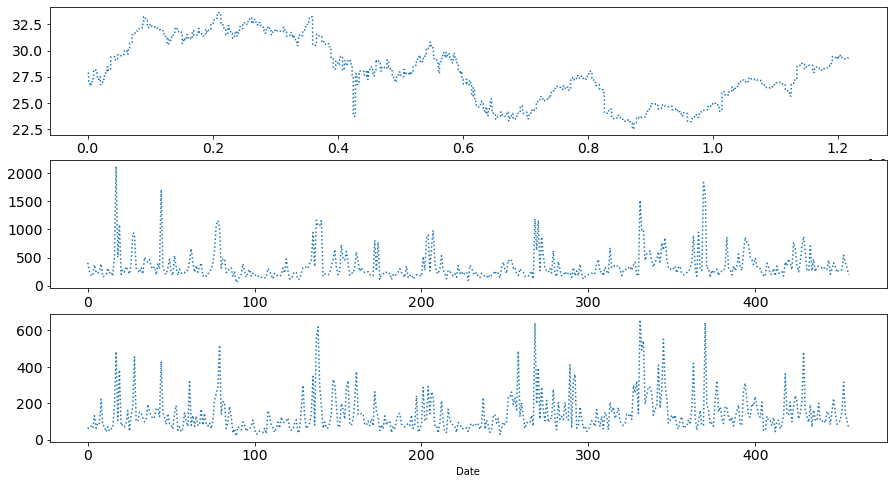

In [454]:
plt.subplot(3, 1, 1)
data["AAPL"]["open"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "open price")

plt.subplot(3, 1, 2)
data_["AAPL"]["s_i*pos"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "daily total (inteaction*positive score)")

plt.subplot(3, 1, 3)
data_["AAPL"]["s_i*neg"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "daily total (inteaction*negative score)")


plt.xlabel("Date",fontsize = 10)

plt.show()

### Observing price movements with the daily average interaciton*score variable

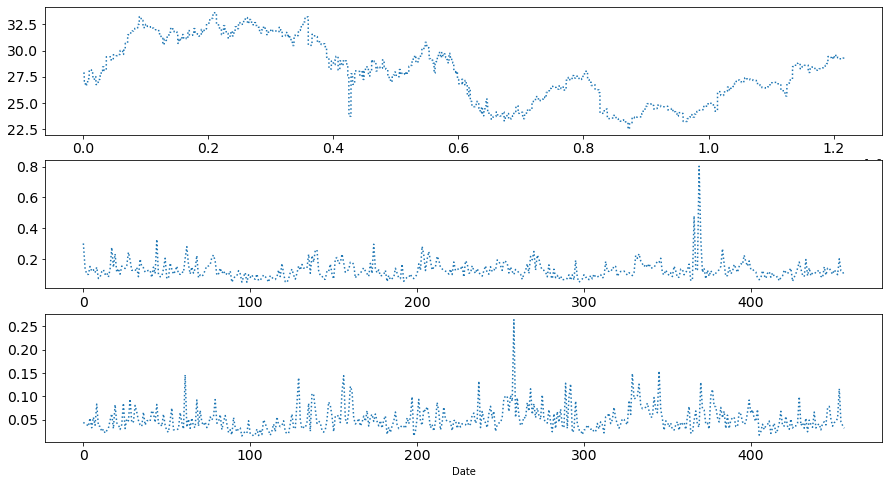

In [455]:
plt.subplot(3, 1, 1)
data["AAPL"]["open"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "open price")

plt.subplot(3, 1, 2)
data_["AAPL"]["m_i*pos"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "daily total (inteaction*positive score)")

plt.subplot(3, 1, 3)
data_["AAPL"]["m_i*neg"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "daily total (inteaction*negative score)")


plt.xlabel("Date",fontsize = 10)

plt.show()

## Generating time series variables

Since the values of the sentiment scores in the previous days may also affect the share price, we created new variables using the moving average and its derivatives.

### Simple moving average

In [456]:
for i in tickers:
    
    data_[i]["SMA_s_i*pos"] = data_[i]['s_i*pos'].transform(lambda x: x.rolling(window = 5).mean())
    data_[i]["SMA_s_i*neg"] = data_[i]['s_i*neg'].transform(lambda x: x.rolling(window = 5).mean())    
    data_[i]["SMA_m_i*pos"] = data_[i]['m_i*pos'].transform(lambda x: x.rolling(window = 5).mean())    
    data_[i]["SMA_m_i*neg"] = data_[i]['m_i*neg'].transform(lambda x: x.rolling(window = 5).mean())    


### Exponential moving average

In [460]:
for i in tickers:
    
    data_[i]["ewm_s_i*pos_5"] = data_[i]['s_i*pos'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
    data_[i]["ewm_s_i*neg_5"] = data_[i]['s_i*neg'].transform(lambda x: x.ewm(span=5, adjust=False).mean())    
    data_[i]["ewm_m_i*pos_5"] = data_[i]['m_i*pos'].transform(lambda x: x.ewm(span=5, adjust=False).mean())    
    data_[i]["ewm_m_i*neg_5"] = data_[i]['m_i*neg'].transform(lambda x: x.ewm(span=5, adjust=False).mean())    
    
    
    data_[i]["ewm_s_i*pos_15"] = data_[i]['s_i*pos'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
    data_[i]["ewm_s_i*neg_15"] = data_[i]['s_i*neg'].transform(lambda x: x.ewm(span=15, adjust=False).mean())    
    data_[i]["ewm_m_i*pos_15"] = data_[i]['m_i*pos'].transform(lambda x: x.ewm(span=15, adjust=False).mean())    
    data_[i]["ewm_m_i*neg_15"] = data_[i]['m_i*neg'].transform(lambda x: x.ewm(span=15, adjust=False).mean()) 
    
        


### Moving Average Convergence Divergence

We obtained the MACD values using the 5-day and 15-day weighted moving average values

In [464]:
for i in tickers:
    
    data_[i]['MACD_s_i*pos'] = data_[i]['ewm_s_i*pos_15'] - data_[i]['ewm_s_i*pos_5']
    data_[i]['MACD_s_i*neg'] = data_[i]['ewm_s_i*neg_15'] - data_[i]['ewm_s_i*neg_5']
    data_[i]['MACD_m_i*pos'] = data_[i]['ewm_m_i*pos_15'] - data_[i]['ewm_m_i*pos_5']
    data_[i]['MACD_m_i*neg'] = data_[i]['ewm_m_i*neg_15'] - data_[i]['ewm_m_i*neg_5']

- We used dropna to get rid of null values in dataframes

In [ ]:
all_df = {}
for i in tickers:
    all_df[i] = data_[i].dropna()

## Model

In [471]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import xgboost as xgb


from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report



In [475]:
def get_scores(ticker,alg):
    
    
    dft = all_df[ticker]
    
    X = dft.drop(["date","open_x","close_x","closed_higher_x"],axis = 1)
    y = dft["closed_higher_x"].shift(-1)
    
    
    X = X.iloc[:-1 , :]
    y.dropna(inplace = True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
    
    
    if alg=="logr":
        
        logr = LogisticRegression(max_iter=1000, C=50)
        
        parameters = [{'penalty':['l1','l2']}, 
                  {'C':[1, 10, 100, 1000]},
                  {"class_weight":["balanced"]},
                  {"max_iter":[300,700,1000,1500,2000]}        
                     ]
        grid_search = GridSearchCV(estimator = logr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
        grid_search.fit(X_train, y_train) 
                
            
        y_predict_logr = grid_search.predict(X_test)
        return print(classification_report(y_test,y_predict_logr))
    
    
    if alg=="svm":
        
        svm = SVC()

        parameters = {'C': [0.1, 1, 10, 100, 1000], 
                      'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                      'kernel': ['rbf'],
                      "class_weight":["balanced"]} 
        grid_search = GridSearchCV(svm, parameters, refit = True)
        grid_search.fit(X_train, y_train)

        y_predict_svm = grid_search.predict(X_test)
        return print(classification_report(y_test,y_predict_svm))
    
    if alg=="GradientBoost":
        
        gb = GradientBoostingClassifier()
        
        parameters = { "criterion": ["friedman_mse",  "mae"],"loss":["deviance","exponential"],
              "max_features":["log2","sqrt"],'learning_rate': [0.01,0.05,0.1,1,0.5],'max_depth': [3,4,5],
              'min_samples_leaf': [4,5,6],'subsample': [0.6,0.7,0.8], 'n_estimators': [5,10,15,20]}

        
        grid_gb = GridSearchCV(gb, parameters, n_jobs=5,cv = 10)
        grid_gb.fit(X_train,y_train)
        yp_gb = grid_gb.predict(X_test)
        return print(classification_report(y_test, yp_gb))
    
    if alg == "knn":
        
        

        knn = KNeighborsClassifier(n_neighbors=20)
        knn.fit(X_train,y_train)
        yp_knn = knn.predict(X_test)
        return print(classification_report(y_test, yp_knn))
    
    if alg == "xgb":
        
        xgbc = xgb.XGBClassifier(n_jobs=-1)
        xgbc.fit(X_train, y_train)
        yp_xgb = xgbc.predict(X_test)
        return print(classification_report(y_test, yp_xgb))
    

    
    

## Identifying the best model for each company

With the get_scores function we created above, we examined the performance of companies with all algorithms. We chose the best model based on precision and recall scores for each company.

In [479]:
get_scores("AAPL","knn")

              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56        62
         1.0       0.47      0.49      0.48        51

    accuracy                           0.52       113
   macro avg       0.52      0.52      0.52       113
weighted avg       0.52      0.52      0.52       113



In [485]:
get_scores("GOOG","xgb")

              precision    recall  f1-score   support

         0.0       0.43      0.52      0.47        25
         1.0       0.68      0.60      0.64        43

    accuracy                           0.57        68
   macro avg       0.56      0.56      0.56        68
weighted avg       0.59      0.57      0.58        68



In [486]:
get_scores("AMZN","logr")

              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60        28
         1.0       0.66      0.72      0.69        32

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.65      0.65      0.65        60



In [495]:
get_scores("MSFT","xgb")

              precision    recall  f1-score   support

         0.0       0.31      0.56      0.40         9
         1.0       0.64      0.39      0.48        18

    accuracy                           0.44        27
   macro avg       0.47      0.47      0.44        27
weighted avg       0.53      0.44      0.46        27



In [499]:
get_scores("TSLA","knn")

              precision    recall  f1-score   support

         0.0       0.42      0.53      0.47        15
         1.0       0.71      0.61      0.65        28

    accuracy                           0.58        43
   macro avg       0.56      0.57      0.56        43
weighted avg       0.61      0.58      0.59        43



## Evaluation

When we examine the scores, we see that the best models we have chosen for Apple and Microsoft companies perform quite poorly.

We can say that the model we created with logistic regression for Amazon is the best model, with an accuracy score of 65 percent compared to other models. We see that it makes predictions with a precision score of 0.66 for class 1. We can have some confidence in this model, as 66 percent of the values that the model predicts as 1 are actually 1. 

In addition, we see that the model we created for Tesla with K-Nearest Neighbor(KNN) predicts with a precision score of 0.71 for class 1, although it is not very good. We can say that it is not bad since 71 percent of the values that the model predicts as 1 are actually 1.